In [1]:
 # using LSTM to predict closing stock price of 'Apple Inc'

In [16]:
import math
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [17]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 12, 17)

In [18]:
df = web.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416980,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483714,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754261,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734026,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.218666,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.774933,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.942558,137310400


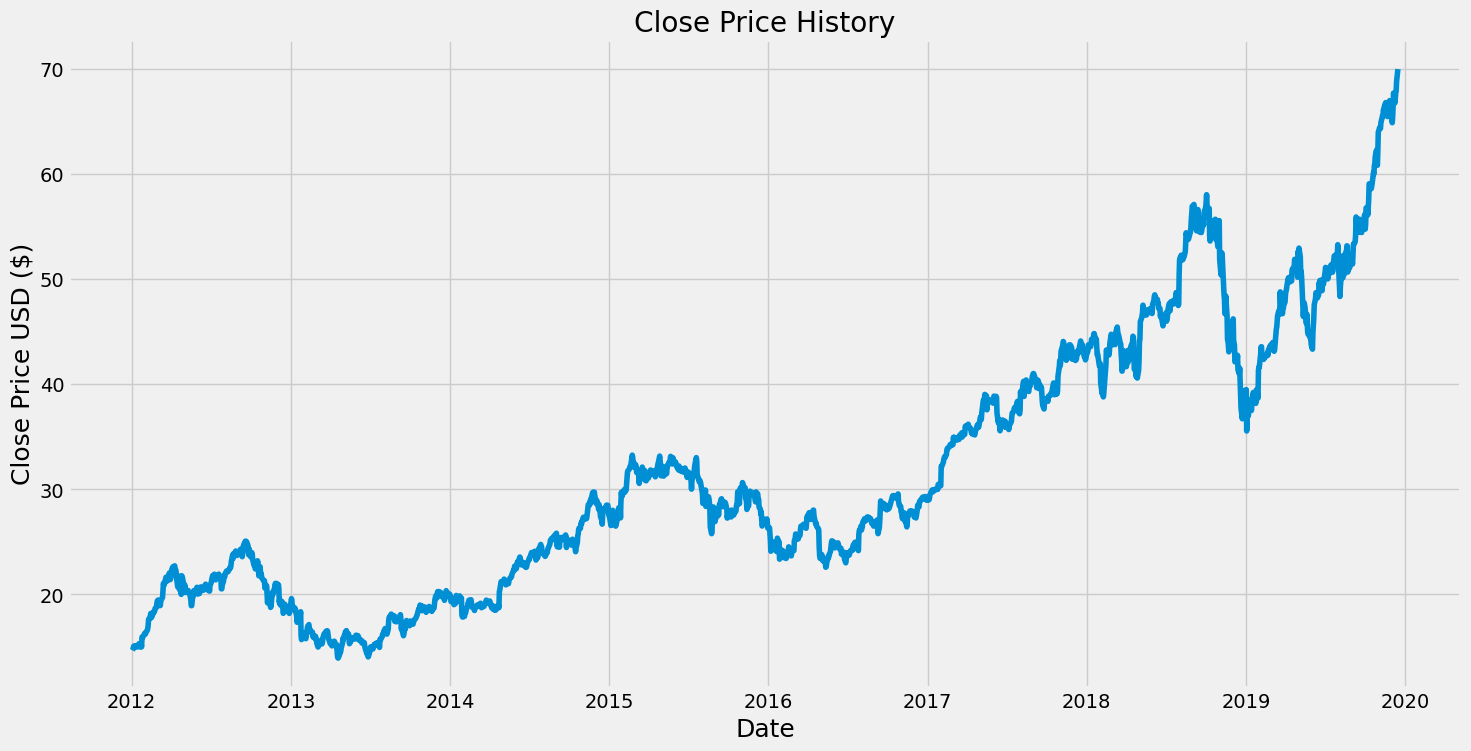

In [21]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
data= df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1602

In [23]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [25]:
# Creating training data
train_data = scaled_data[0:training_data_len , :]

x_train= []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [28]:
# converting training datasets to np.array
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
#Reshaping the data for LSTM
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [32]:
# building a Lstm model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
 model.compile(optimizer='adam', loss= 'mean_squared_error')

In [34]:
#training
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 55s 33ms/step - loss: 6.4342e-04


In [36]:
# testing dataset
test_data= scaled_data[training_data_len - 60: , :]

x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [37]:
x_test= np.array(x_test)

In [38]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [39]:
# predicted price values
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 16ms/step


In [41]:
# RMSE
rmse= np.sqrt( np.mean(predictions - y_test) **2)
rmse

1.056637716293335

<ipython-input-64-625ebf585628>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


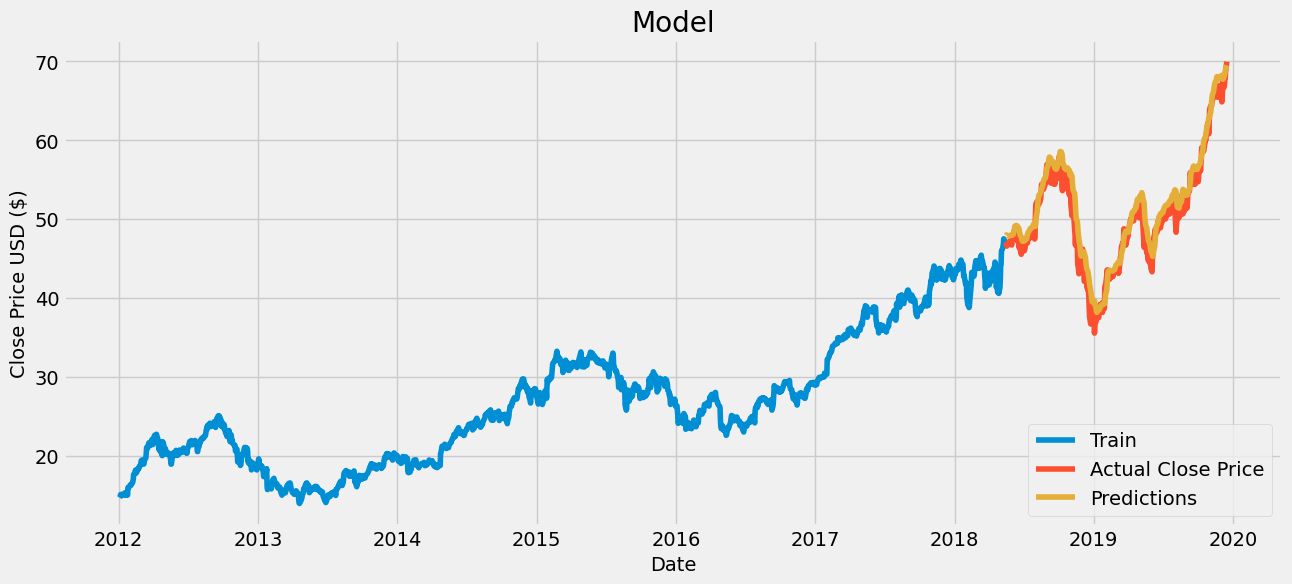

In [64]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel("Close Price USD ($)",fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Close Price','Predictions'], loc='lower right')
plt.show()

In [46]:
#Displaying actual and predicted price
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.944443
2018-05-17,46.747501,47.997730
2018-05-18,46.577499,47.975990
2018-05-21,46.907501,47.897144
2018-05-22,46.790001,47.863907
...,...,...
2019-12-10,67.120003,68.287193
2019-12-11,67.692497,68.511238
2019-12-12,67.864998,68.801270


In [55]:
# predicting future price
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 12, 18)

df = web.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [48]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416980,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483714,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754261,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734026,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.218666,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.774933,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.942558,137310400


In [49]:
#Predicted price of 18-12-2019
new_df = df.filter(['Close'])

# getting last 60 days closing price and to array
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

# converting X_test to np array
X_test = np.array(X_test)
# reshaping for lstm
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted scaled price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 30ms/step
[[70.1139]]


In [63]:
#Actual Price of 18-12-2019
start = datetime.datetime(2019, 12, 18)
end = datetime.datetime(2019, 12, 18)

df2 = web.get_data_yahoo('AAPL', start=start, end=end)
df2
print([[69.93]])                                # verified directly from the source (https://finance.yahoo.com/quote/AAPL/history/?guccounter=1&period1=1576627200&period2=1721811615)

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2019-12-18 00:00:00 -> 2019-12-18 00:00:00)')


$AAPL: possibly delisted; No price data found  (1d 2019-12-18 00:00:00 -> 2019-12-18 00:00:00)
[[69.93]]
